In [1]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import solovay_kitaev as sk
from math import e, pi

# Basic usage

In [3]:
# Unitary matrix you want to approximate
# Rz(1/64)
target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/32)]])

# prepare epsilon network used for basic approximation
enet = sk.generate_epsilon_network()

# execute Solovay Kitaev algorithm
result = sk.solovay_kitaev(enet, target, 4)

# print out the calculated gates
print(result.construction_str())

(I+iY)T(I-iY)T(I-iZ)(I+iY)XTX(I-iY)(I+iZ)XTX(I+iX)T(I-iY)(I-iZ)T(I-iZ)(I+iX)T(I-iY)(I-iZ)(I+iZ)XTX(I+iZ)(I+iY)XTX(I-iX)(I+iY)T(I-iY)(I+iZ)(I+iY)XTX(I-iX)XXTXX(I-iZ)(I+iY)XXTXX(I-iY)(I+iZ)XTX(I+iY)XTX(I-iY)(I+iY)XTX(I-iY)(I+iX)XXTXX(I-iY)(I-iZ)XXTXX(I-iZ)(I+iZ)(I+iY)XTX(I-iX)(I+iZ)XTX(I+iY)T(I-iY)(I+iY)T(I+iY)T(I+iX)T(I+iY)Z(I+iY)XTX(I-iY)Z(I-iY)XTX(I-iX)XTX(I-iY)XTX(I-iY)T(I-iZ)(I+iX)T(I-iY)(I-iZ)(I+iZ)XTX(I+iZ)(I+iY)XTX(I-iX)(I+iY)T(I-iY)(I+iY)T(I+iX)(I-iZ)T(I+iY)T(I+iX)TZ(I+iZ)(I-iX)XTX(I-iY)ZXTX(I-iX)XTX(I-iY)XTX(I+iY)T(I+iX)T(I+iY)T(I+iX)(I+iZ)(I+iY)XTX(I-iY)(I+iX)XXTXX(I-iY)(I-iZ)XXTXX(I-iZ)(I+iZ)(I+iY)XTX(I-iX)(I+iZ)XTX(I-iZ)(I-iX)XTX(I-iY)XTX(I-iX)XTX(I-iY)XXTXX(I+iY)XXTXX(I+iX)XXTXXZ(I+iY)XXTXX(I+iX)(I-iZ)ZXTX(I-iX)XTX(I-iY)XTX(I+iZ)(I-iX)XTX(I-iY)(I+iY)T(I+iX)T(I+iX)T(I-iY)Z(I+iY)T(I+iX)(I-iZ)Z(I+iY)XTX(I-iX)XTX(I-iX)XTX(I-iY)(I+iZ)(I-iX)XTX(I-iY)(I+iY)XXTXX(I+iY)XXTXX(I+iX)XXTXX(I+iY)Z(I+iY)XXTXX(I-iY)Z(I-iY)XTX(I-iX)XTX(I-iY)XTX(I-iY)(I+iY)XTX(I-iY)XXTXX(I-iZ)(I+iX)XXTXX(I-i

In [4]:
# (number of gates, distance) per iteration
counts = 10
x = [x for x in range(counts)]
distances = []
length = []
number_T = []

for i in range(counts):
    result = sk.solovay_kitaev(enet, target, i)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print("iteration: {}, length: {} (T gates {} / {:.4f}%), distance: {:e}".format(i
                                                                    , l, t, (t/l*100 if l!=0 else 0), d))

iteration: 0, length: 0 (T gates 0 / 0.0000%), distance: 4.908246e-02
iteration: 1, length: 0 (T gates 0 / 0.0000%), distance: 4.908246e-02
iteration: 2, length: 188 (T gates 40 / 21.2766%), distance: 1.226137e-01
iteration: 3, length: 1434 (T gates 278 / 19.3863%), distance: 4.020622e-02
iteration: 4, length: 6886 (T gates 1190 / 17.2814%), distance: 1.944502e-02
iteration: 5, length: 45030 (T gates 6794 / 15.0877%), distance: 4.230744e-03
iteration: 6, length: 248646 (T gates 33294 / 13.3901%), distance: 2.369166e-04
iteration: 7, length: 1363678 (T gates 164054 / 12.0303%), distance: 4.150114e-06
iteration: 8, length: 7548966 (T gates 829214 / 10.9845%), distance: 1.212104e-08
iteration: 9, length: 40803342 (T gates 4118118 / 10.0926%), distance: 8.502638e-09


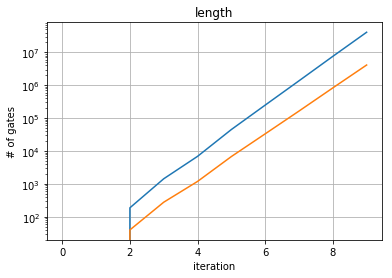

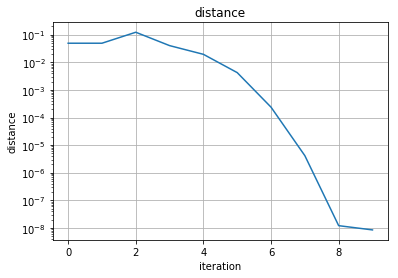

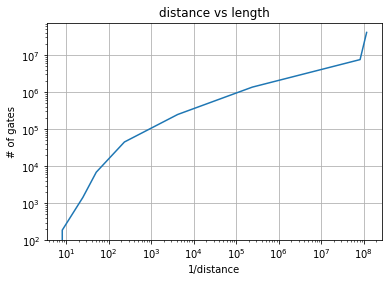

In [13]:
plt.figure()
#plt.subplot(3,1,1)
plt.plot(x, length)
plt.plot(x, number_T)
plt.yscale('log')
plt.title('length')
plt.xlabel('iteration')
plt.ylabel('# of gates')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,2)
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('iteration')
plt.ylabel('distance')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,3)
plt.plot([1.0/d for d in distances], length)
plt.yscale('log')
plt.xscale('log')
plt.title('distance vs length')
plt.xlabel('1/distance')
plt.ylabel('# of gates')
plt.grid(True)


In [22]:
# another interesting fact is the result is strongly influenced by the initial e-net
# let's try the 7-round solovary-kitaev calculation with different ε0 nets
counts = 5
x = [x for x in range(counts)]
distances = []
length = []
number_T = []

for i in range(5):
    enet = sk.generate_epsilon_network(i)
    result = sk.solovay_kitaev(enet, target, 7)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print(f"ε0 depth:{i} (size:{len(enet)}), length: {l} (T gates {t} / {(t/l*100 if l!=0 else 0):.4f}%),"
          f" distance: {d:e}")

ε0 depth:0 (size:96), length: 591904 (T gates 68648 / 11.5978%), distance: 1.904595e-05
ε0 depth:1 (size:96), length: 591904 (T gates 68648 / 11.5978%), distance: 1.904595e-05
ε0 depth:2 (size:240), length: 758264 (T gates 88544 / 11.6772%), distance: 1.248789e-04
ε0 depth:3 (size:528), length: 1363678 (T gates 164054 / 12.0303%), distance: 4.150114e-06
ε0 depth:4 (size:1104), length: 2186408 (T gates 270392 / 12.3670%), distance: 9.416922e-10


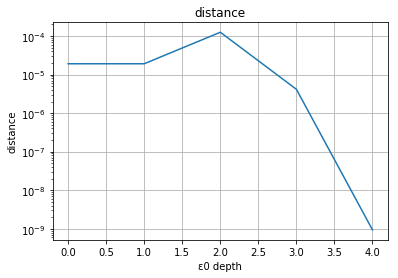

In [23]:
plt.figure()
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('ε0 depth')
plt.ylabel('distance')
plt.grid(True)